In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import math
import random

In [2]:
y = torch.tensor([[1.10,1.10,1.10,1.10,1.10],
                  [1.10,1.10,1.10,1.10,1.10],
                  [1.10,1.10,1.10,1.10,1.10],
                  [1.10,1.10,1.10,1.10,1.10],
                  [1.10,1.10,1.10,1.10,1.10],])
y_hat1 = torch.tensor([[1.03,1.03,1.03,1.03,1.03],
                       [1.03,1.03,1.03,1.03,1.03],
                       [1.03,1.03,1.03,1.03,1.03],
                       [1.03,1.03,1.03,1.03,1.03],
                       [1.03,1.03,1.03,1.03,1.03],])
y_hat2 = torch.tensor([[1.01,1.01,1.01,1.01,1.01],
                       [1.01,1.01,1.01,1.01,1.01],
                       [1.01,1.01,1.01,1.01,1.01],
                       [1.01,1.01,1.01,1.01,1.01],
                       [1.01,1.01,1.01,1.01,1.01],])

###### criterion = nn.KLDivLoss()
loss1 = criterion(y,y_hat1)
loss2 = criterion(y,y_hat2)
print('loss 1 : {}'.format(loss1))
print('loss 2 : {}'.format(loss2))

In [3]:
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        # inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice

In [4]:
criterion = DiceLoss()
loss1 = criterion(y,y_hat1)
loss2 = criterion(y,y_hat2)
print('loss 1 : {}'.format(loss1))
print('loss 2 : {}'.format(loss2))

loss 1 : -0.06267285346984863
loss 2 : -0.0520930290222168


In [5]:
anchor = torch.randn(100, 128, requires_grad=True)

In [6]:
anchor

tensor([[ 0.5894,  0.4152,  1.2824,  ..., -0.7247,  0.1203,  0.2501],
        [-0.4737,  0.0464,  2.6323,  ..., -0.8151,  0.2059, -1.0778],
        [ 0.3229,  1.1844,  0.2658,  ...,  0.4866, -2.2345, -1.7036],
        ...,
        [-1.2607, -1.1238,  1.6388,  ...,  1.5702, -0.7729, -0.9904],
        [-0.7051,  1.0646, -0.0565,  ..., -1.4209, -0.2923, -0.8897],
        [ 0.4131, -1.7084, -0.7286,  ..., -2.2731,  0.0430,  1.0015]],
       requires_grad=True)

In [7]:
model = RobertaForSequenceClassification(MODEL_NAME,24)

NameError: name 'RobertaForSequenceClassification' is not defined

In [14]:
model.bert.encoder.layer[0]

RobertaLayer(
  (attention): RobertaAttention(
    (self): RobertaSelfAttention(
      (query): Linear(in_features=768, out_features=768, bias=True)
      (key): Linear(in_features=768, out_features=768, bias=True)
      (value): Linear(in_features=768, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): RobertaSelfOutput(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): RobertaIntermediate(
    (dense): Linear(in_features=768, out_features=3072, bias=True)
  )
  (output): RobertaOutput(
    (dense): Linear(in_features=3072, out_features=768, bias=True)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [26]:
model.bert.encoder.layer[0].attention.self.query

Linear(in_features=768, out_features=768, bias=True)

In [15]:
list(model.bert.encoder.layer[0].attention.self.value.parameters())

[Parameter containing:
 tensor([[ 0.0013,  0.0397,  0.0352,  ...,  0.0087, -0.0279,  0.0172],
         [ 0.0298,  0.0487, -0.0277,  ..., -0.0174,  0.0145,  0.0212],
         [ 0.0028, -0.0338, -0.0392,  ...,  0.0202, -0.0394,  0.0125],
         ...,
         [-0.0269,  0.0373, -0.0087,  ..., -0.0152, -0.0086, -0.0107],
         [-0.0309, -0.0189, -0.0469,  ...,  0.0455, -0.0070,  0.0312],
         [ 0.0212,  0.0141,  0.0004,  ..., -0.0121, -0.0122,  0.0239]],
        requires_grad=True),
 Parameter containing:
 tensor([-2.1704e-02,  4.6958e-03,  1.1399e-02, -1.5390e-02,  8.7822e-03,
         -9.4673e-03,  3.5090e-03, -1.5868e-02,  2.0370e-02,  7.9437e-03,
          5.1930e-04, -1.3330e-02,  7.3201e-03, -3.3357e-04,  4.9465e-03,
         -1.1159e-03,  8.3455e-03, -1.4708e-02, -1.4520e-02, -7.2312e-03,
          3.1131e-02, -1.7900e-03,  1.9223e-02, -6.0176e-03,  3.2437e-03,
         -5.6747e-04,  5.4753e-03,  1.9259e-02, -1.6914e-03,  1.5346e-04,
          2.0017e-02,  2.0931e-02,  1.89

In [58]:
x = list(model.bert.encoder.layer[0].attention.self.query.parameters())[0].data
x

tensor([[ 0.0149,  0.0202,  0.0302,  ...,  0.0057, -0.0113, -0.0225],
        [-0.0569,  0.0186,  0.0062,  ...,  0.0121, -0.0153,  0.0126],
        [ 0.0135, -0.0128,  0.0405,  ..., -0.0384,  0.0373, -0.0279],
        ...,
        [ 0.0521,  0.0021, -0.0508,  ...,  0.0534, -0.0321,  0.0261],
        [ 0.0779,  0.0410,  0.0308,  ...,  0.0647,  0.0165,  0.0415],
        [-0.0381, -0.0468,  0.0601,  ..., -0.0421, -0.0078, -0.0436]])

In [59]:
y = list(model.bert.encoder.layer[1].attention.self.query.parameters())[0].data
y

tensor([[-0.0018,  0.0177,  0.0639,  ..., -0.0090, -0.0084,  0.0235],
        [ 0.0073,  0.0067,  0.0388,  ...,  0.0165, -0.0252,  0.0192],
        [ 0.0254, -0.0230, -0.0188,  ..., -0.0064, -0.0064,  0.0853],
        ...,
        [-0.0181,  0.0045,  0.0045,  ...,  0.0032, -0.0152, -0.0131],
        [-0.0080, -0.0160, -0.0021,  ..., -0.0290,  0.0550,  0.0239],
        [-0.0355, -0.0506, -0.0188,  ...,  0.0300, -0.0216,  0.0226]])

In [62]:
y_hat = list(model.bert.encoder.layer[2].attention.self.query.parameters())[0].data
y_hat

tensor([[ 0.0241,  0.0389,  0.0040,  ...,  0.0335,  0.0147, -0.0311],
        [-0.0576, -0.0329, -0.0015,  ..., -0.0170, -0.0157,  0.0442],
        [-0.0223,  0.0025, -0.0002,  ..., -0.0745,  0.0420,  0.0251],
        ...,
        [-0.0032, -0.0407, -0.0129,  ..., -0.0144, -0.0147, -0.0322],
        [-0.0037, -0.0208, -0.0348,  ...,  0.0338,  0.0078,  0.0418],
        [-0.0099,  0.0293, -0.0044,  ..., -0.0352, -0.0309, -0.0080]])

In [61]:
loss = criterion(x,y)
print(loss)

tensor(0.9463)


In [63]:
loss = criterion(x,y_hat)
print(loss)

tensor(1.0797)


In [1]:
from model_utils import *
import random
import time
import os
from tqdm import tqdm, trange, tqdm_notebook
from tqdm.notebook import tqdm as notetqdm

## Dice Loss

In [2]:
MODEL_NAME = 'skimai/spanberta-base-cased'
pmodel = 'results/NewsCate-finetune-1121/3e-05-128/1121-epoch-3.pth'
model1 = 'results/elmundo_on_trained-1202/3e-05-128/1202-epoch-4.pth'
model2 = 'results/elmundo_raw_model-results-1202/3e-05-128/1202-epoch-4.pth'
criterion = DiceLoss()
models = [model1,model2]
cate_nums = [7,7]
# 0--trained on raw model
# 1--further-train model
m_loss, b_loss = para_compare(MODEL_NAME,pmodel,models,criterion,cate_nums)

compare model 0 loaded
compare model 1 loaded
models loaded
paras-size: 4 * 12 * 6: 


In [3]:
import matplotlib.pyplot as plt

In [4]:
m_loss

[[],
 [[tensor(0.9867), tensor(1.0604), tensor(1.0070)],
  [tensor(0.9977), tensor(1.0093), tensor(1.3127)],
  [tensor(1.0440), tensor(0.9951), tensor(1.0206)],
  [tensor(0.9569), tensor(0.9060), tensor(0.9190)],
  [tensor(0.7010), tensor(1.0184), tensor(1.6076)],
  [tensor(1.0040), tensor(1.0942), tensor(1.3819)],
  [tensor(3.0821), tensor(0.9487), tensor(0.8699)],
  [tensor(0.9283), tensor(0.9775), tensor(0.8830)],
  [tensor(1.1962), tensor(0.9288), tensor(0.9540)],
  [tensor(0.9091), tensor(0.9639), tensor(0.9710)],
  [tensor(1.0098), tensor(1.0077), tensor(0.8259)],
  [tensor(1.0829), tensor(0.8448), tensor(2.7875)]],
 [[tensor(0.9874), tensor(1.0593), tensor(1.0066)],
  [tensor(0.9978), tensor(1.0114), tensor(1.3038)],
  [tensor(1.0393), tensor(0.9974), tensor(1.0229)],
  [tensor(0.9640), tensor(0.9010), tensor(0.9249)],
  [tensor(0.7019), tensor(1.0174), tensor(1.6023)],
  [tensor(1.0003), tensor(1.0861), tensor(1.3732)],
  [tensor(2.6681), tensor(0.9477), tensor(0.8705)],
  [ten

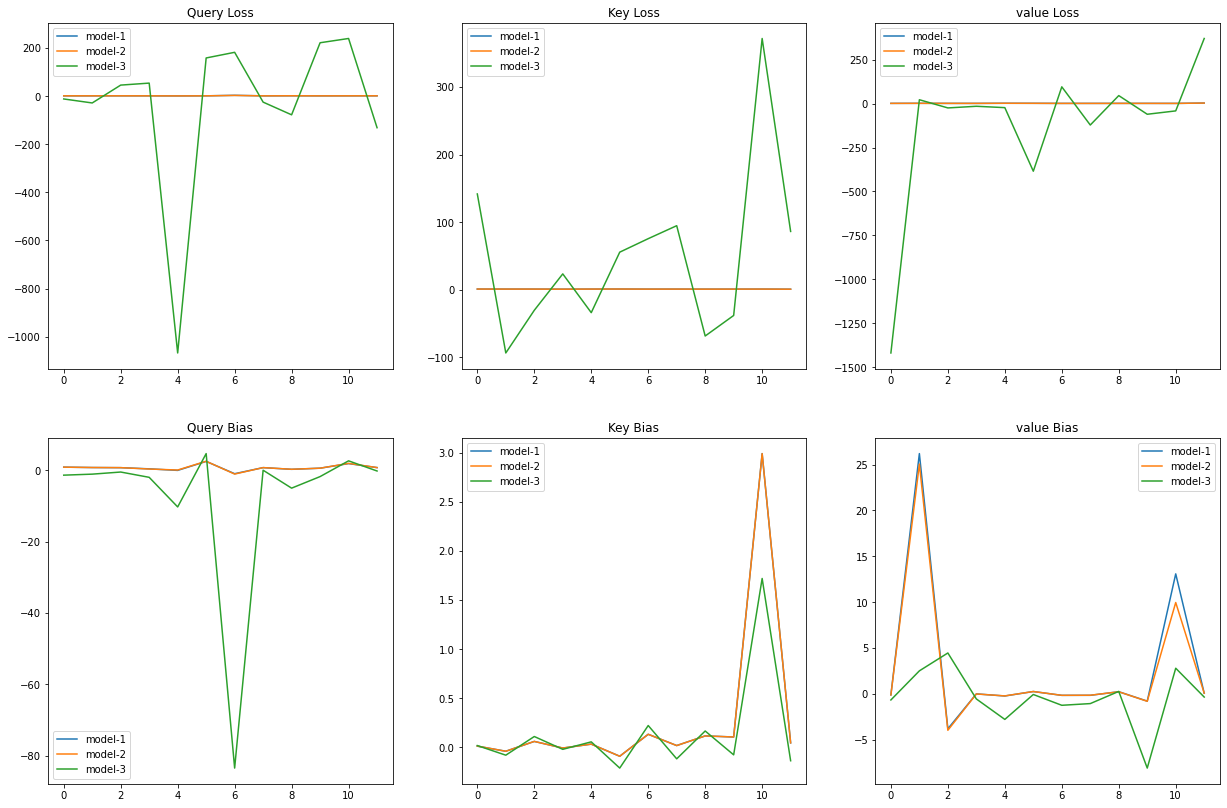

In [5]:
model_num = len(m_loss)
layer_idx = [i for i in range(12)]
matrix_titles = ['Query Loss','Key Loss','value Loss']
bias_titles = ['Query Bias','Key Bias','value Bias']
plt.figure(figsize=(21,14))
for idx in range(1,4):
    plt.subplot(2,3,idx)
    plt.title(matrix_titles[idx-1])
    for i in range(1,model_num):
        plt.plot(layer_idx, [value[idx-1] for value in m_loss[i]], label='model-{}'.format(i))
    plt.legend()

for idx in range(1,4):
    plt.subplot(2,3,idx+3)
    plt.title(bias_titles[idx-1])
    for i in range(1,model_num):
        plt.plot(layer_idx, [value[idx-1] for value in b_loss[i]], label='model-{}'.format(i))
    plt.legend()
